In [91]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#  import the basic libraries and configuration
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set up display
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [92]:
# import knn algo
from sklearn.neighbors import KNeighborsClassifier
# import data set and metric modules
from sklearn import datasets, metrics

In [93]:
df = pd.read_csv('Dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Analyzing the data (including cleaning)

In [94]:
df.shape # rows and columns

(768, 9)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [97]:
# replacting the 0 to NaNs cause some of the is just missing values we will replace it for a much reasonable data after wards
df_c = df.copy()
df_c[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_c[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


## showing the count of NaNs
print(df_c.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

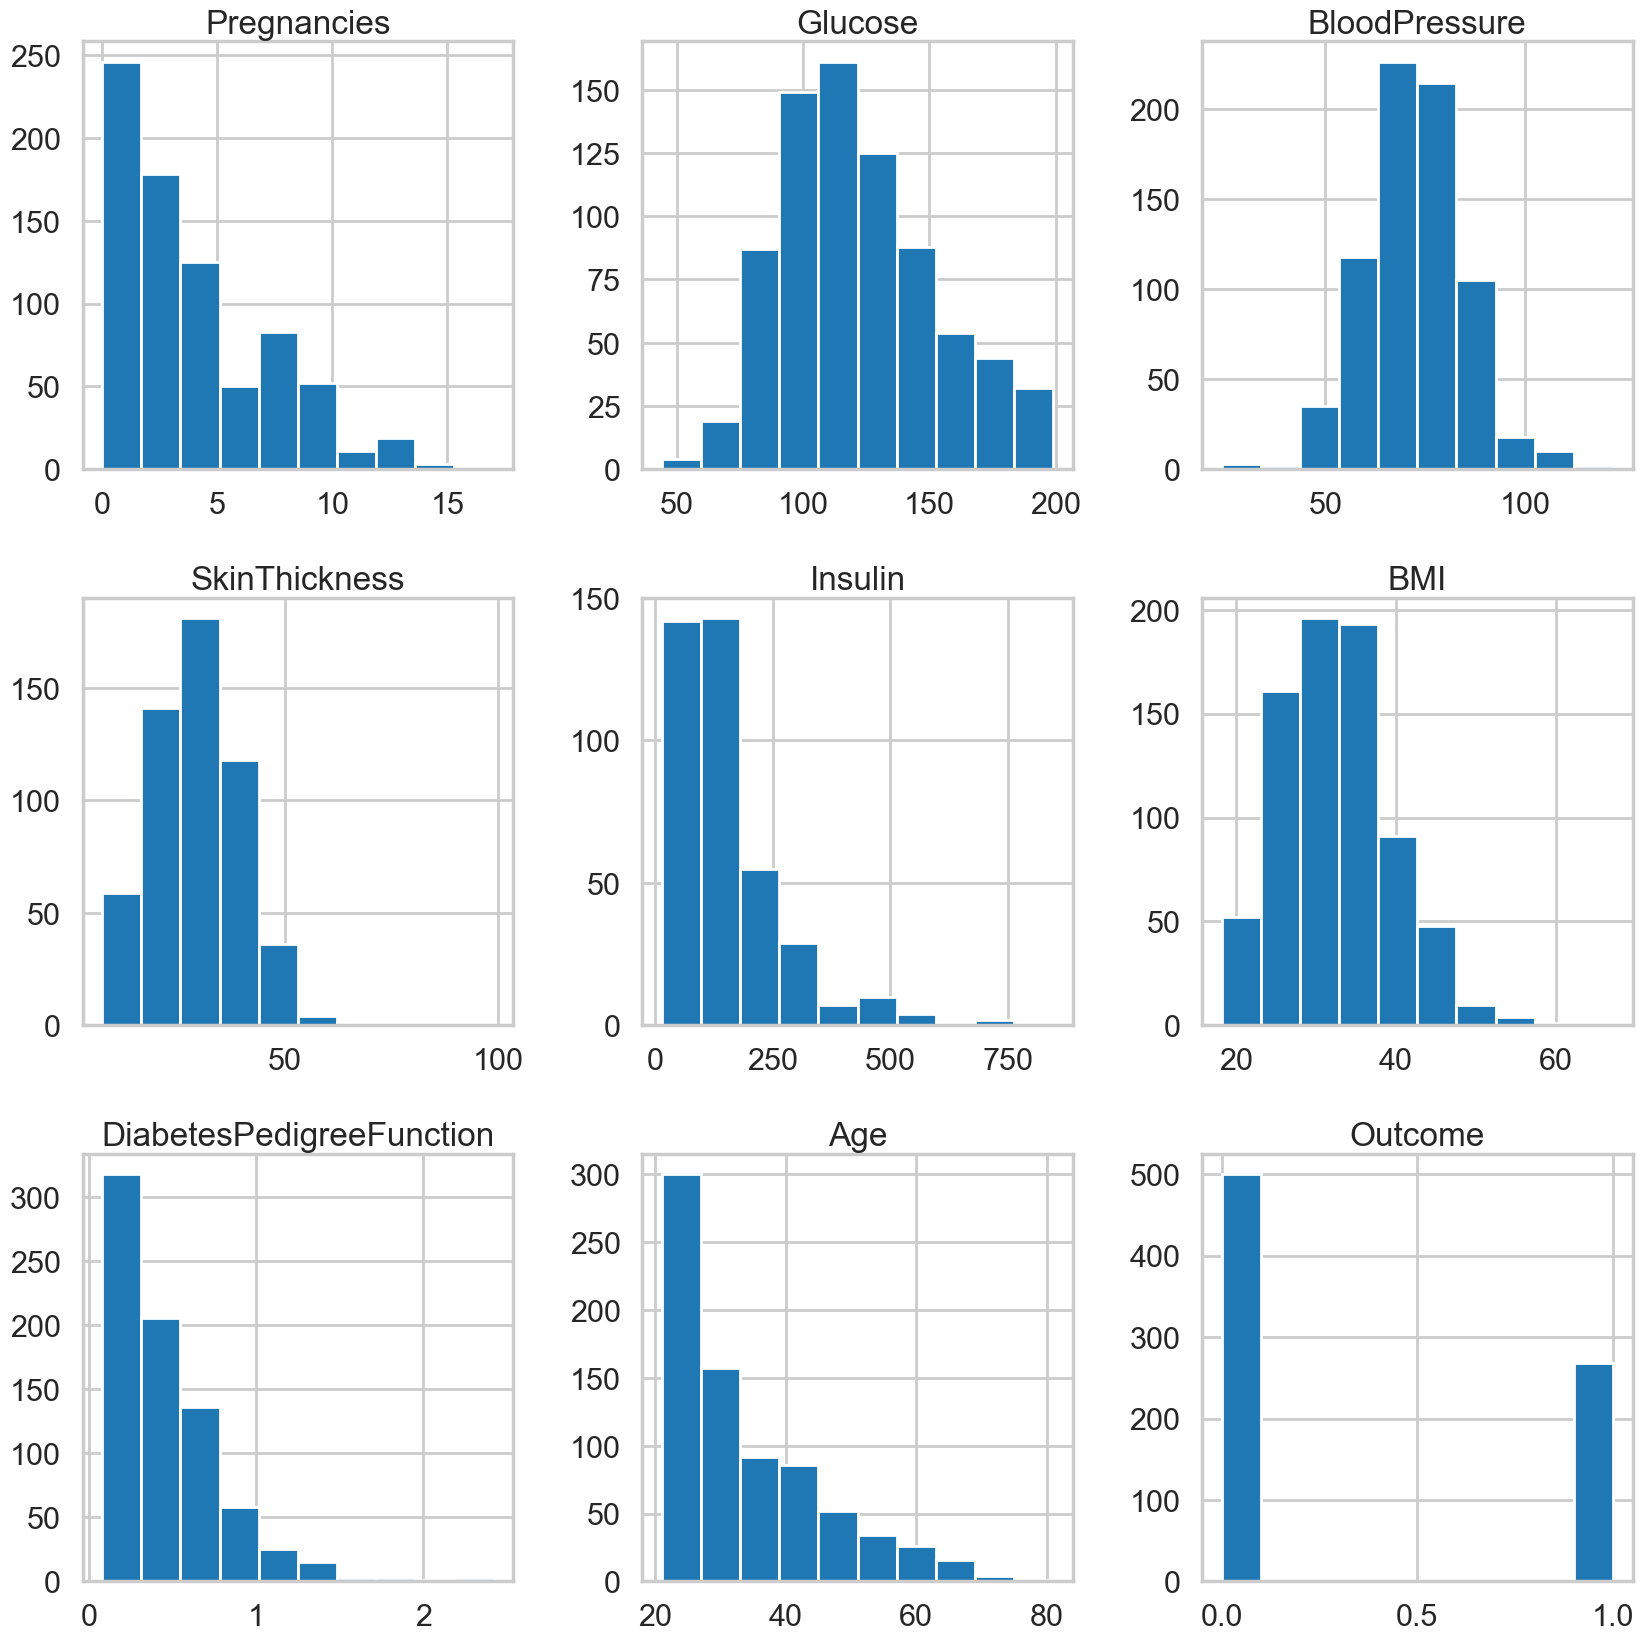

In [98]:
df_c.hist(figsize = (20,20))

### Imputing nan values, instead of 0, we will assume the data based on the average data in the specific column

In [99]:
df_c['Glucose'].fillna(df_c['Glucose'].mean(), inplace = True)
df_c['BloodPressure'].fillna(df_c['BloodPressure'].mean(), inplace = True)
df_c['SkinThickness'].fillna(df_c['SkinThickness'].median(), inplace = True)
df_c['Insulin'].fillna(df_c['Insulin'].median(), inplace = True)
df_c['BMI'].fillna(df_c['BMI'].median(), inplace = True)

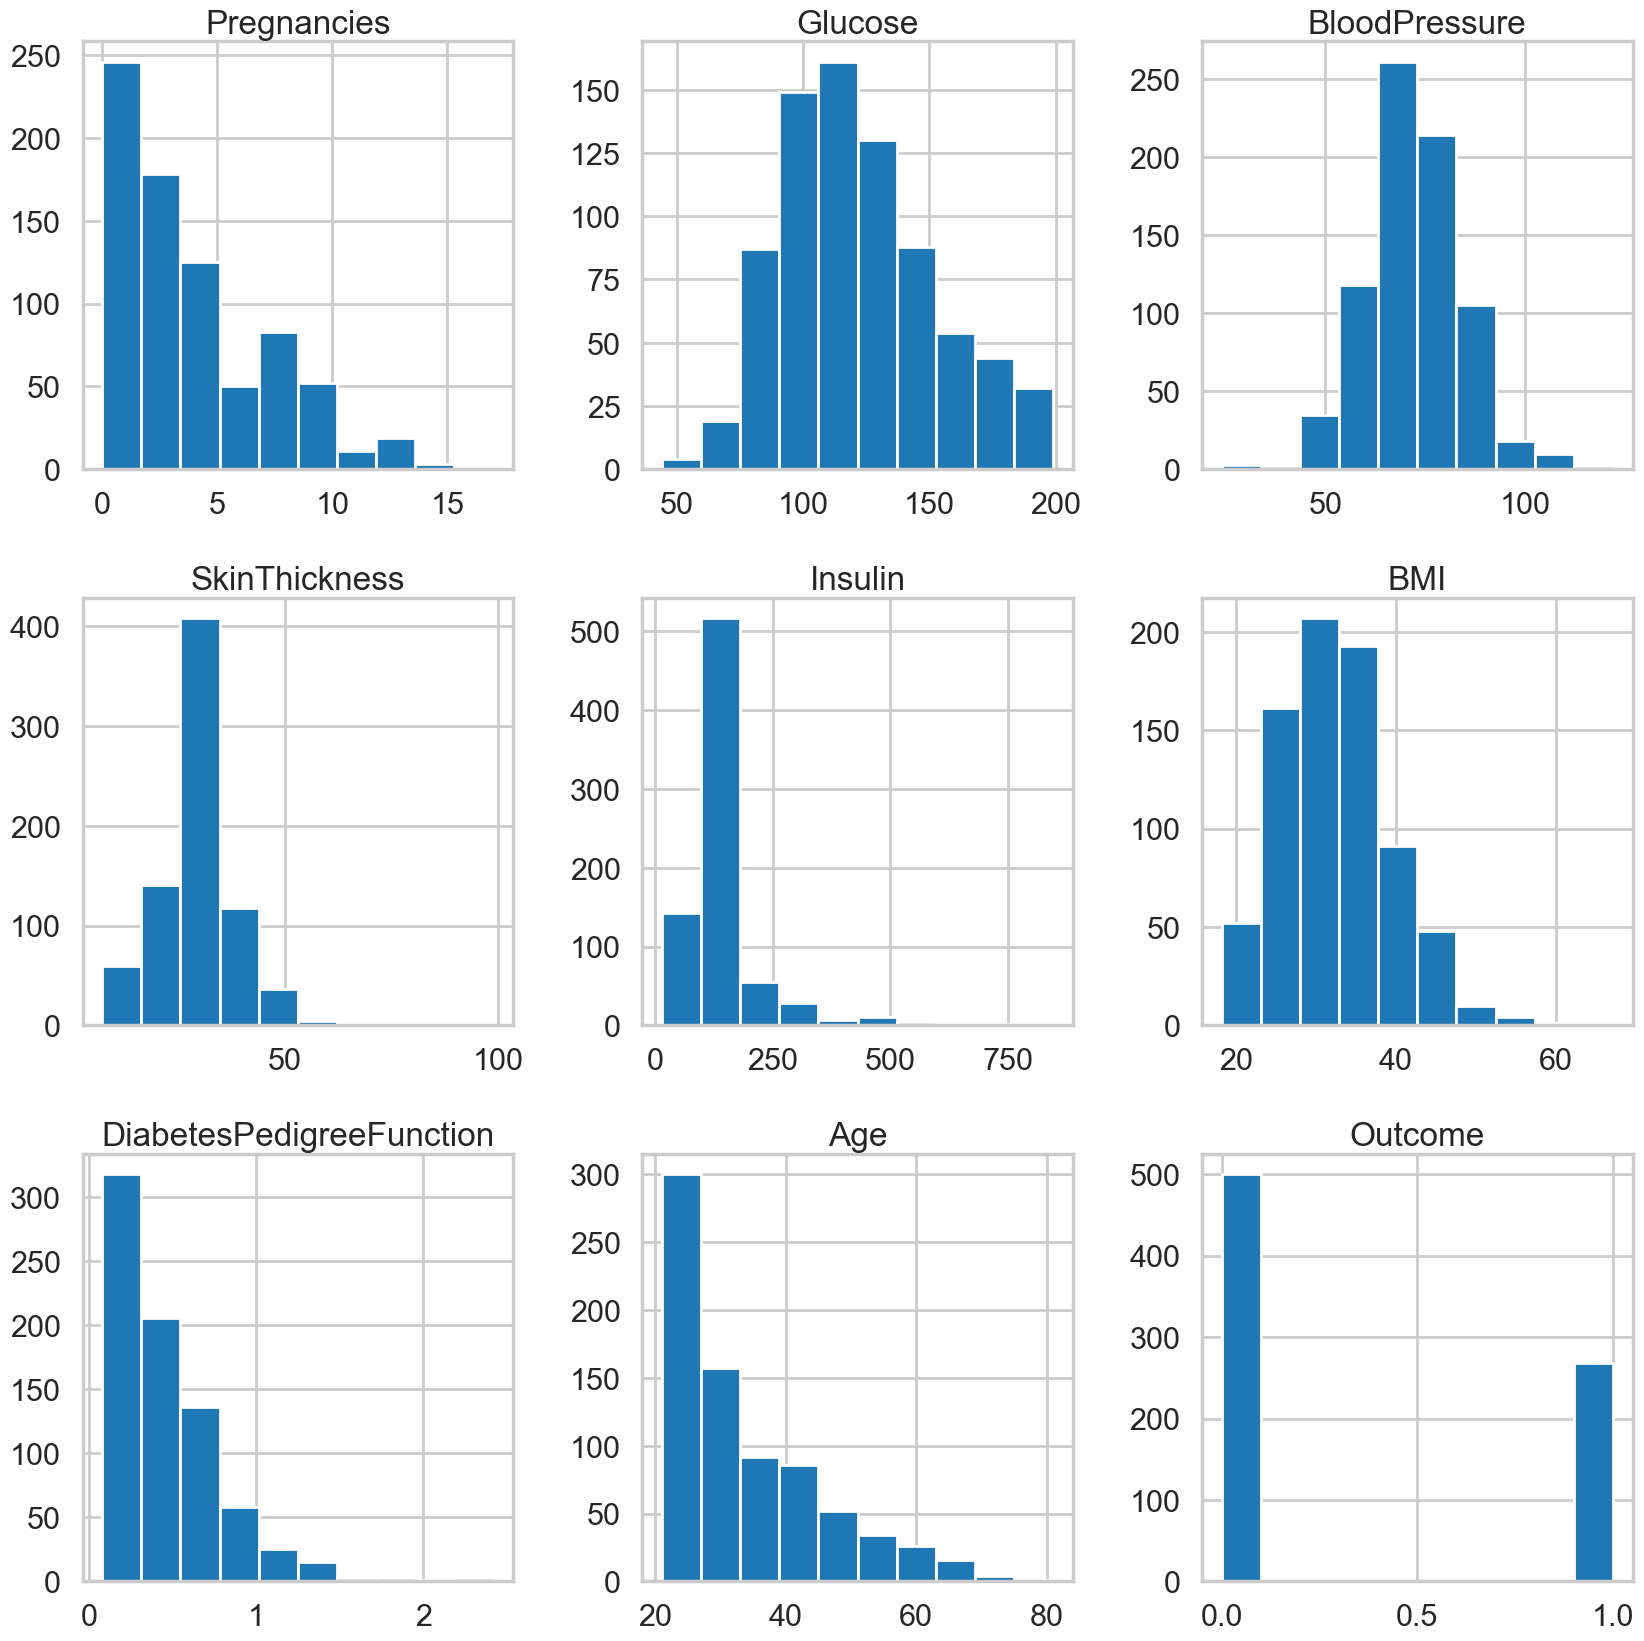

In [100]:
p = df_c.hist(figsize = (20,20))

### as we can see, imputing the data leads to skewness of the data

In [101]:
# observe the shape of the data 
df_c.shape

(768, 9)

<AxesSubplot:>

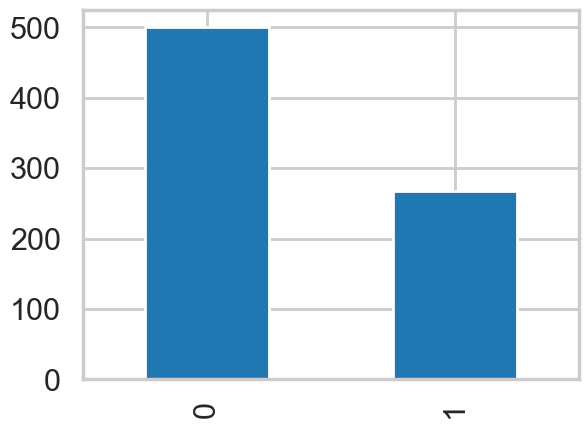

In [102]:
# checking the balance of the data by plotting the outcome

df_c.Outcome.value_counts().plot(kind="bar")

 The above data shows that the data is biased toward datapoint having outcome of valoes of 0

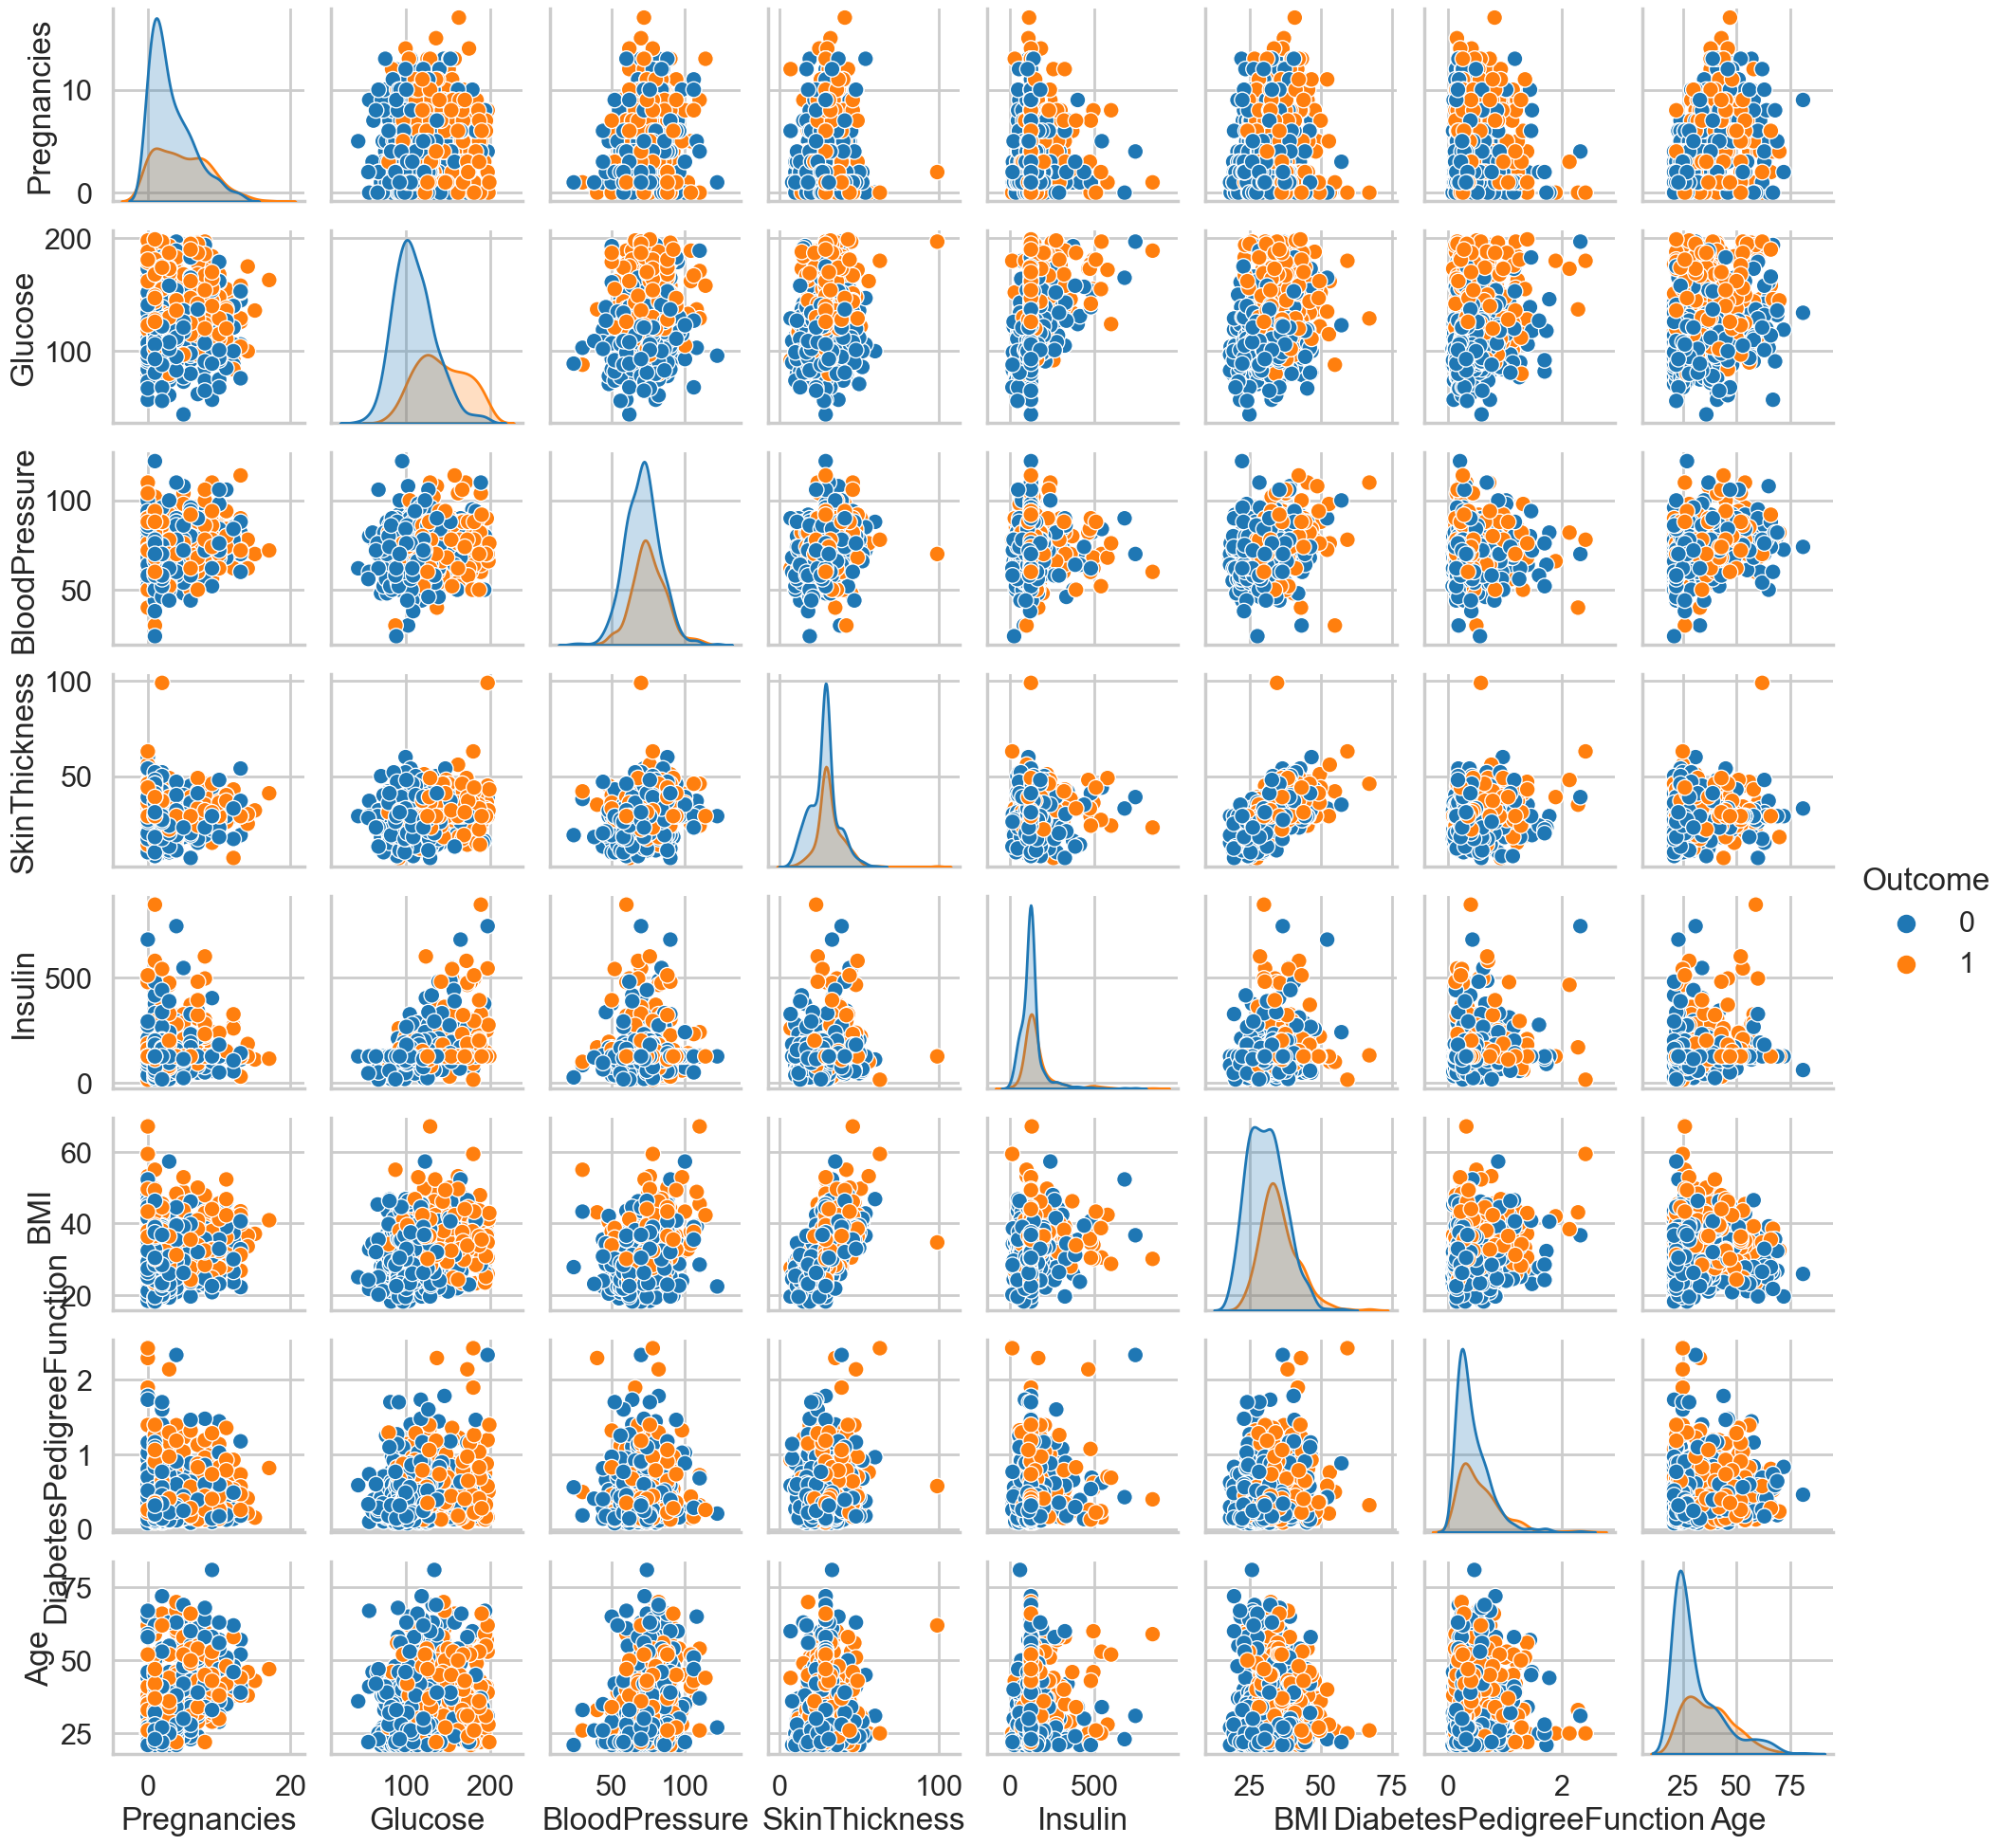

In [103]:
sns.pairplot(df_c, hue = 'Outcome')

<AxesSubplot:>

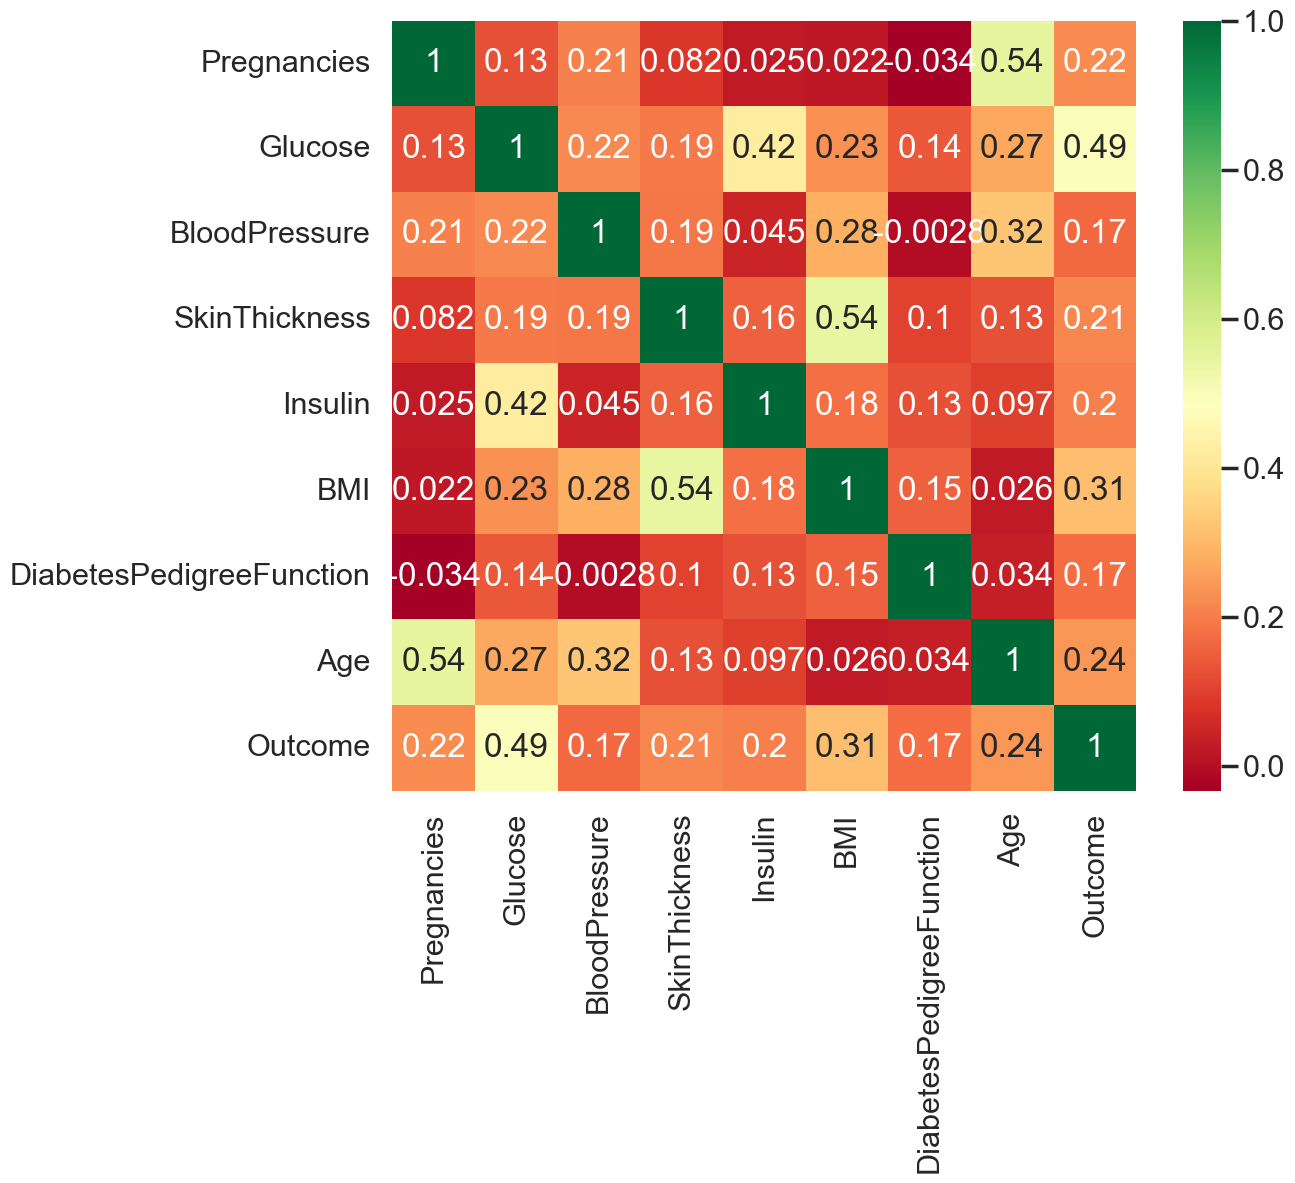

In [104]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df_c.corr(), annot=True,cmap ='RdYlGn')

## scaling or normalize the data

In [105]:
# import needed library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# get the feature and scale it
X = df_c.drop('Outcome', axis=1)
X = pd.DataFrame(scaler.fit_transform(X), # we return the scaled data in a data frame for better understanding since fir_transform returns only an array
                columns = [
                    'Pregnancies',
                    'Glucose',
                    'BloodPressure',
                    'SkinThickness',
                    'Insulin',
                    'BMI',
                    'DiabetesPedigreeFunction',
                    'Age'
                ])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [106]:
# predictor
Y = df_c.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Perform train test split

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=Y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((512, 8), (256, 8), (512,), (256,))

## perform a trial and error testing for best data points to use for training

In [108]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [109]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [110]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


## Visuals for the result of testing

<AxesSubplot:>

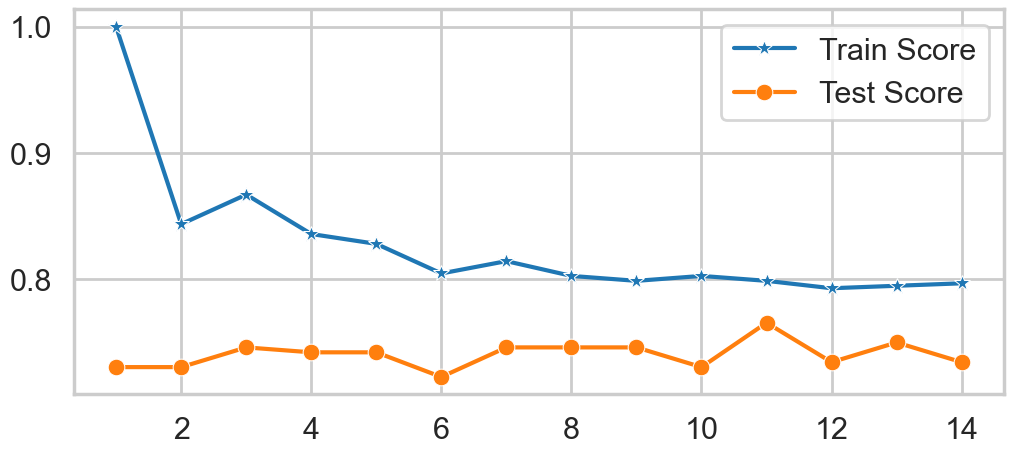

In [111]:
plt.figure(figsize=(12,5))
sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

**As we can see, the 11 is the highest and really neer to train score, which means we will gonna use 11 for final model**

# Final Model

In [112]:

knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)   # the accuracy of the model

0.765625

## Model performance analysis

In [113]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, -2.2833333333333368, 'Predicted label')

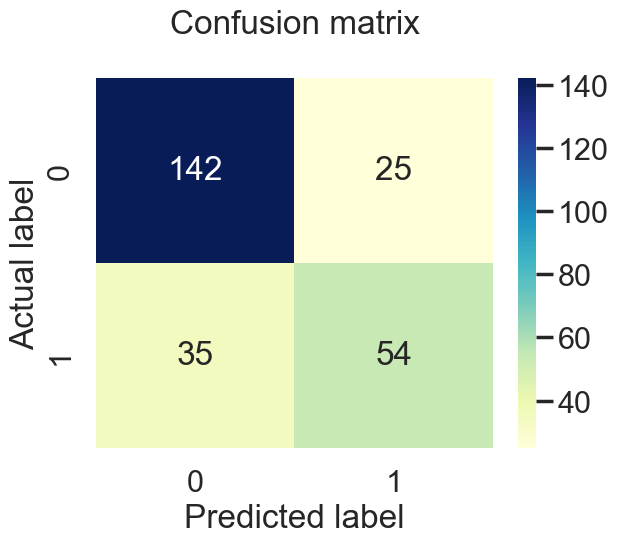

In [114]:
# for better visual
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,St='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [118]:
#import classification_report
from sklearn.metrics import classification_report


print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256


